In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter

In [2]:
df=pd.read_csv('DNI_hr.csv')
df = df[["Date","Direct Normal [W/m^2]"]]
df["Date"] = pd.to_datetime(df["Date"])
df.set_index('Date', inplace=True)
df

,Direct Normal [W/m^2]
Date,
2008-06-01 00:00:00,0.000000
2008-06-01 01:00:00,0.000000
2008-06-01 02:00:00,0.000000
2008-06-01 03:00:00,0.000000
2008-06-01 04:00:00,12.084972
...,...
2013-12-31 19:00:00,0.000000
2013-12-31 20:00:00,0.000000
2013-12-31 21:00:00,0.000000


In [3]:
from datetime import timedelta
train_end = datetime(2013,12,30, 23, 0)
test_end = datetime(2013,12,31,23,0)
train_data = df[:train_end]
test_data = df[train_end + timedelta(hours=1):test_end]

# Seasonal average forecast

In [4]:
dni_avg = []

for i in range(0, 24):
    hourly_data = train_data.loc[train_data.index.hour == i]
    mean_dni = hourly_data['Direct Normal [W/m^2]'].mean()
    dni_avg.append(mean_dni)


In [5]:
test_data['predicted_DNI'] = test_data.index.hour.map(lambda x: dni_avg[x])

residuals = test_data['predicted_DNI'] - test_data['Direct Normal [W/m^2]']
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 197.7084882811838


/tmp/ipykernel_24150/1404551742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_DNI'] = test_data.index.hour.map(lambda x: dni_avg[x])


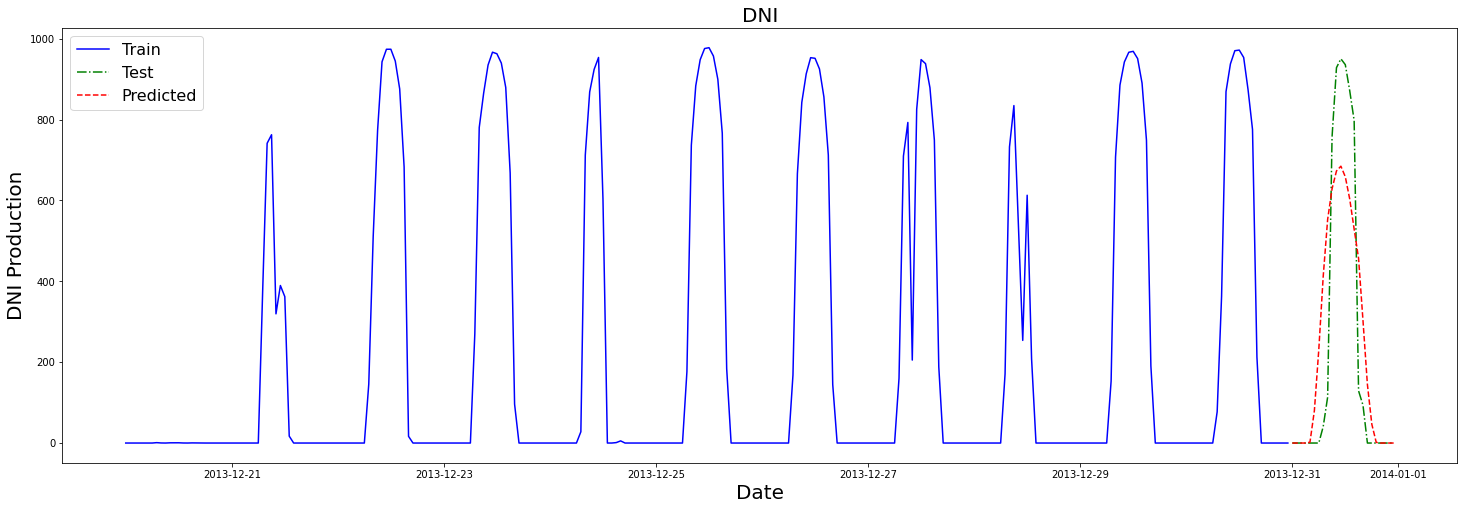

In [6]:
# from datetime import timedelta
# train_end = datetime(2013,12,30, 23, 0)
# test_end = datetime(2013,12,31,23,0)
# train_data = df[:train_end]
# test_data = df[train_end + timedelta(hours=1):test_end]



#plot prediction
start_date = datetime(2013,12,20)
end_date = datetime(2013,12,30, 23, 0)
lim_train_data = train_data[start_date:end_date]

plt.figure(figsize=(25,8))

plt.plot(lim_train_data,'b-', label='Train')
plt.plot(test_data['Direct Normal [W/m^2]'],'g-.', label='Test')
plt.plot(test_data['predicted_DNI'], 'r--', label='Predicted')
plt.legend(loc=2,fontsize=16)

plt.title('DNI', fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('DNI Production', fontsize=20)
plt.show()

# Seasonal Naive Forecast

In [7]:
naive_DNI = train_data.loc['2013-12-30'].reset_index()
test_data['naive_DNI'] = test_data.index.hour.map(naive_DNI['Direct Normal [W/m^2]'])
residuals = test_data['naive_DNI'] - test_data['Direct Normal [W/m^2]']
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 147.53061297793212


/tmp/ipykernel_24150/3519550298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['naive_DNI'] = test_data.index.hour.map(naive_DNI['Direct Normal [W/m^2]'])


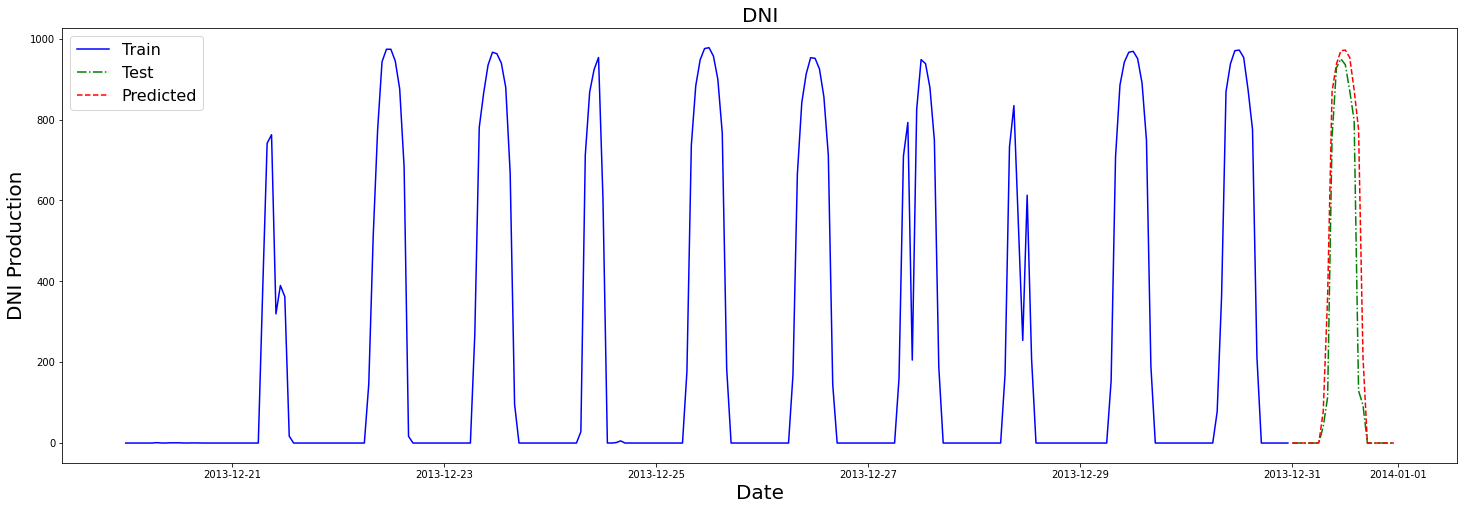

In [8]:
#plot prediction
start_date = datetime(2013,12,20)
end_date = datetime(2013,12,30, 23, 0)
lim_train_data = train_data[start_date:end_date]

plt.figure(figsize=(25,8))

plt.plot(lim_train_data,'b-', label='Train')
plt.plot(test_data['Direct Normal [W/m^2]'],'g-.', label='Test')
plt.plot(test_data['naive_DNI'], 'r--', label='Predicted')
plt.legend(loc=2,fontsize=16)

plt.title('DNI', fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('DNI Production', fontsize=20)
plt.show()


# Exponential Smoothing

In [9]:
from statsmodels.tsa.api import ExponentialSmoothing
holt_winter = ExponentialSmoothing(train_data.values,
                                      seasonal='add',
                                      seasonal_periods=24).fit(smoothing_level=0,
                                                                  smoothing_trend=0,
                                                                  smoothing_seasonal=.5,
                                                                  optimized=False)

predictions=holt_winter.forecast(len(test_data))
predictions=pd.Series(predictions, index=test_data.index)

In [12]:
residuals=test_data['Direct Normal [W/m^2]']-predictions
print("Root Mean Squared Error:", np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 144.49545100710375


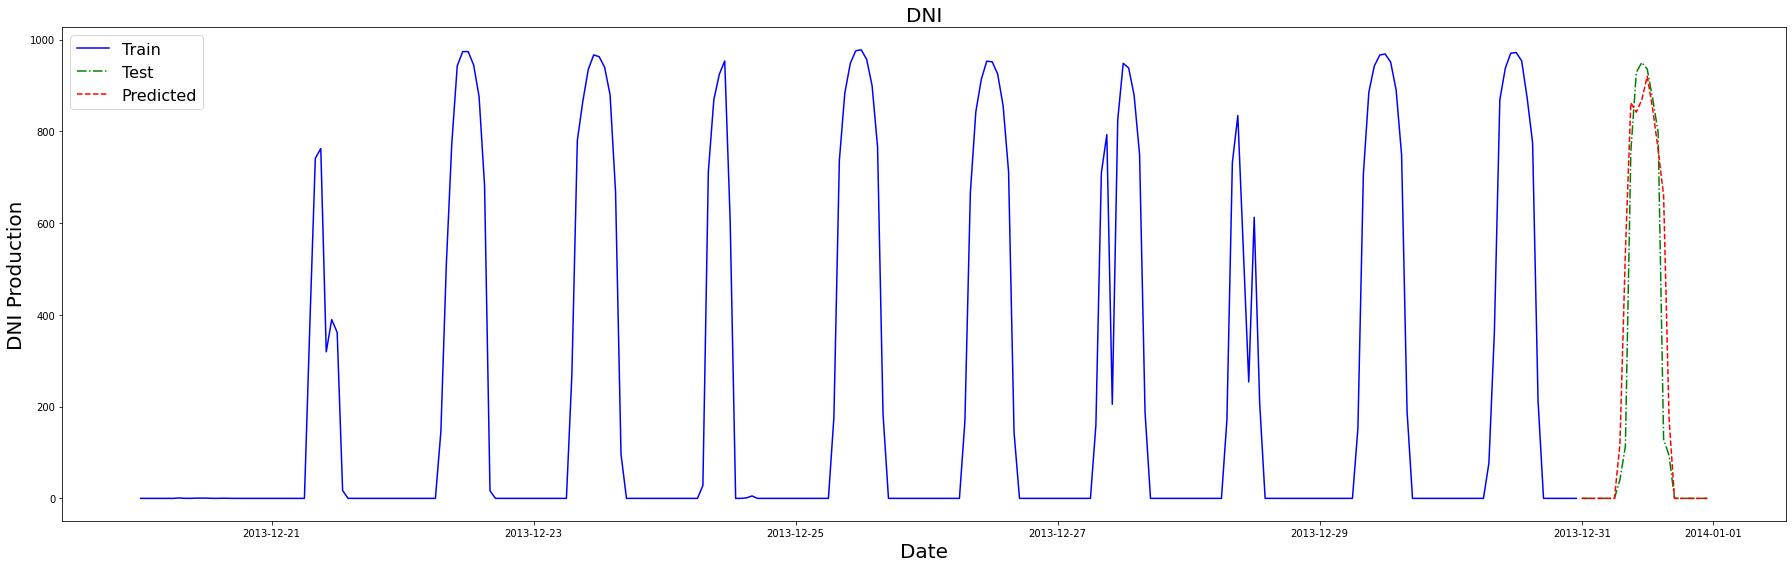

In [20]:
plt.figure(figsize=(25,8))

plt.plot(lim_train_data,'b-', label='Train')
plt.plot(test_data['Direct Normal [W/m^2]'],'g-.', label='Test')
plt.plot(predictions, 'r--', label='Predicted')
plt.legend(loc=2,fontsize=16)

plt.title('DNI', fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('DNI Production', fontsize=20)
# plt.axvspan(265, 289, color='#808080', alpha=0.2)
plt.tight_layout()

plt.show()

# Long term forecast 

# average seasonal forecast

In [21]:
from datetime import timedelta
train_end = datetime(2013,12,24, 23, 0)
test_end = datetime(2013,12,31,23,0)
train_data = df[:train_end]
test_data = df[train_end + timedelta(hours=1):test_end]

In [22]:
dni_avg = []

for i in range(0, 24):
    hourly_data = train_data.loc[train_data.index.hour == i]
    mean_dni = hourly_data['Direct Normal [W/m^2]'].mean()
    dni_avg.append(mean_dni)

In [23]:
test_data['predicted_DNI'] = test_data.index.hour.map(lambda x: dni_avg[x])

residuals = test_data['predicted_DNI'] - test_data['Direct Normal [W/m^2]']
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 193.3614767836178


/tmp/ipykernel_24150/1404551742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_DNI'] = test_data.index.hour.map(lambda x: dni_avg[x])


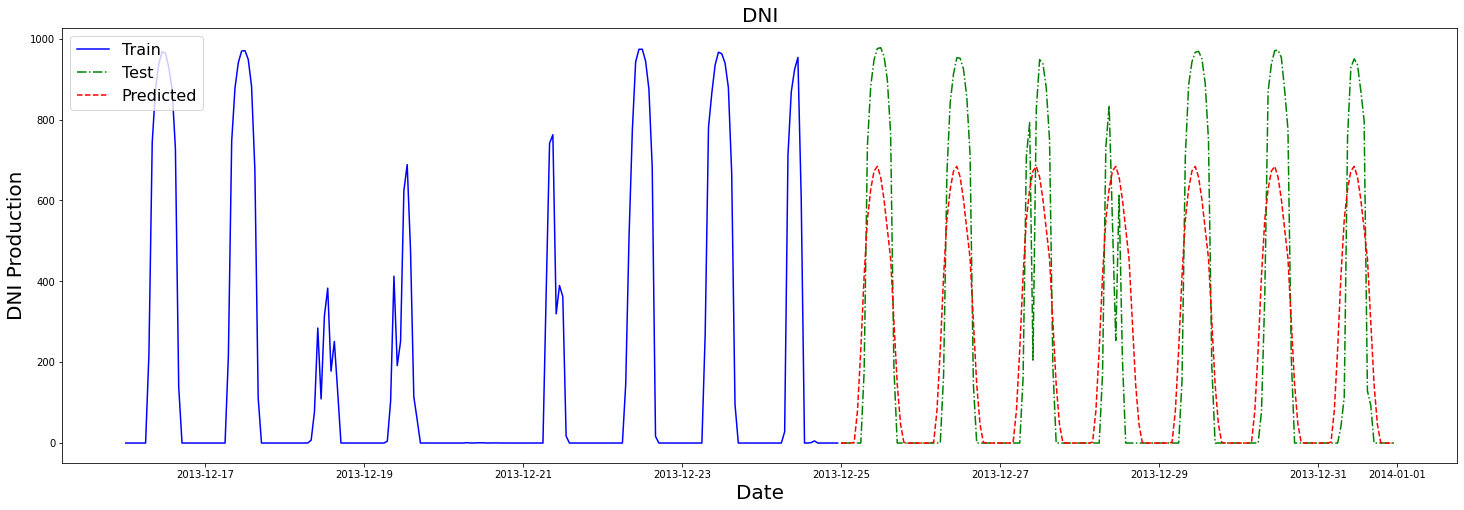

In [24]:
start_date = datetime(2013,12,16)
end_date = datetime(2013,12,24, 23, 0)
lim_train_data = train_data[start_date:end_date]

plt.figure(figsize=(25,8))

plt.plot(lim_train_data,'b-', label='Train')
plt.plot(test_data['Direct Normal [W/m^2]'],'g-.', label='Test')
plt.plot(test_data['predicted_DNI'], 'r--', label='Predicted')
plt.legend(loc=2,fontsize=16)

plt.title('DNI', fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('DNI Production', fontsize=20)
plt.show()

# Naive Seasonal forecast

In [26]:
naive_DNI = train_data[-len(test_data):].reset_index()
test_data['naive_DNI'] = test_data.index.hour.map(naive_DNI['Direct Normal [W/m^2]'])
residuals = test_data['naive_DNI'] - test_data['Direct Normal [W/m^2]']
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 360.6987438550772


/tmp/ipykernel_24150/2471769396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['naive_DNI'] = test_data.index.hour.map(naive_DNI['Direct Normal [W/m^2]'])


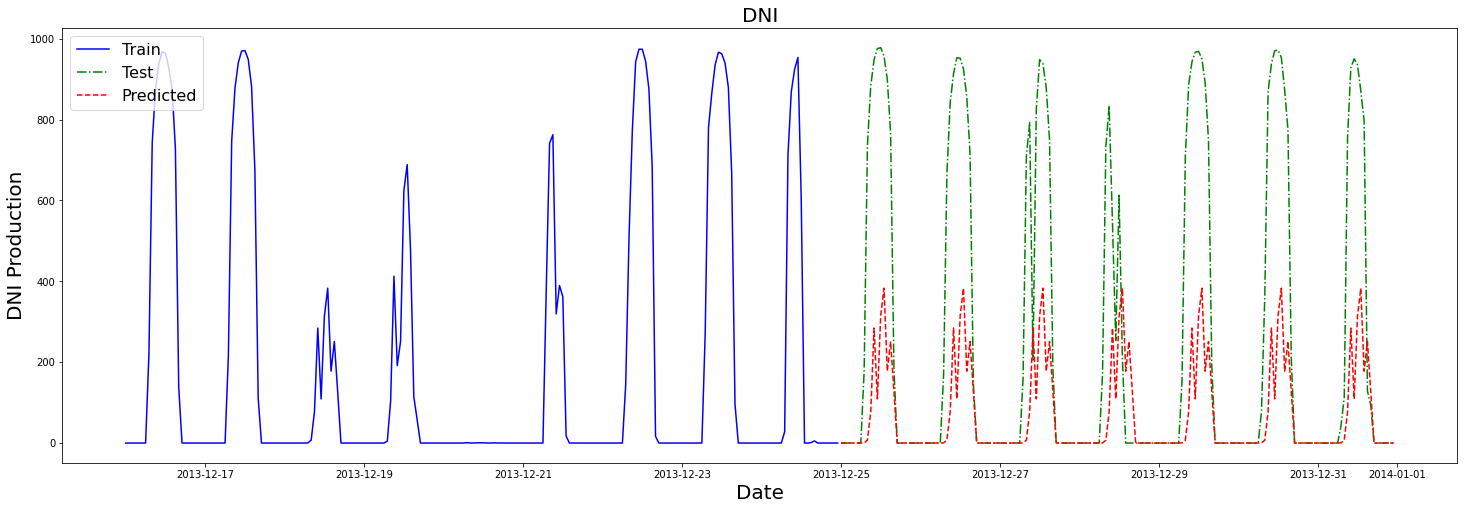

In [27]:
#plot prediction
start_date = datetime(2013,12,16)
end_date = datetime(2013,12,24, 23, 0)
lim_train_data = train_data[start_date:end_date]

plt.figure(figsize=(25,8))

plt.plot(lim_train_data,'b-', label='Train')
plt.plot(test_data['Direct Normal [W/m^2]'],'g-.', label='Test')
plt.plot(test_data['naive_DNI'], 'r--', label='Predicted')
plt.legend(loc=2,fontsize=16)

plt.title('DNI', fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('DNI Production', fontsize=20)
plt.show()

# Exponential Smoothing

In [28]:
from statsmodels.tsa.api import ExponentialSmoothing
holt_winter = ExponentialSmoothing(train_data.values,
                                      seasonal='add',
                                      seasonal_periods=24).fit(smoothing_level=0,
                                                                  smoothing_trend=0,
                                                                  smoothing_seasonal=.5,
                                                                  optimized=False)

predictions=holt_winter.forecast(len(test_data))
predictions=pd.Series(predictions, index=test_data.index)

In [29]:
residuals=test_data['Direct Normal [W/m^2]']-predictions
print("Root Mean Squared Error:", np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 202.26071821151982


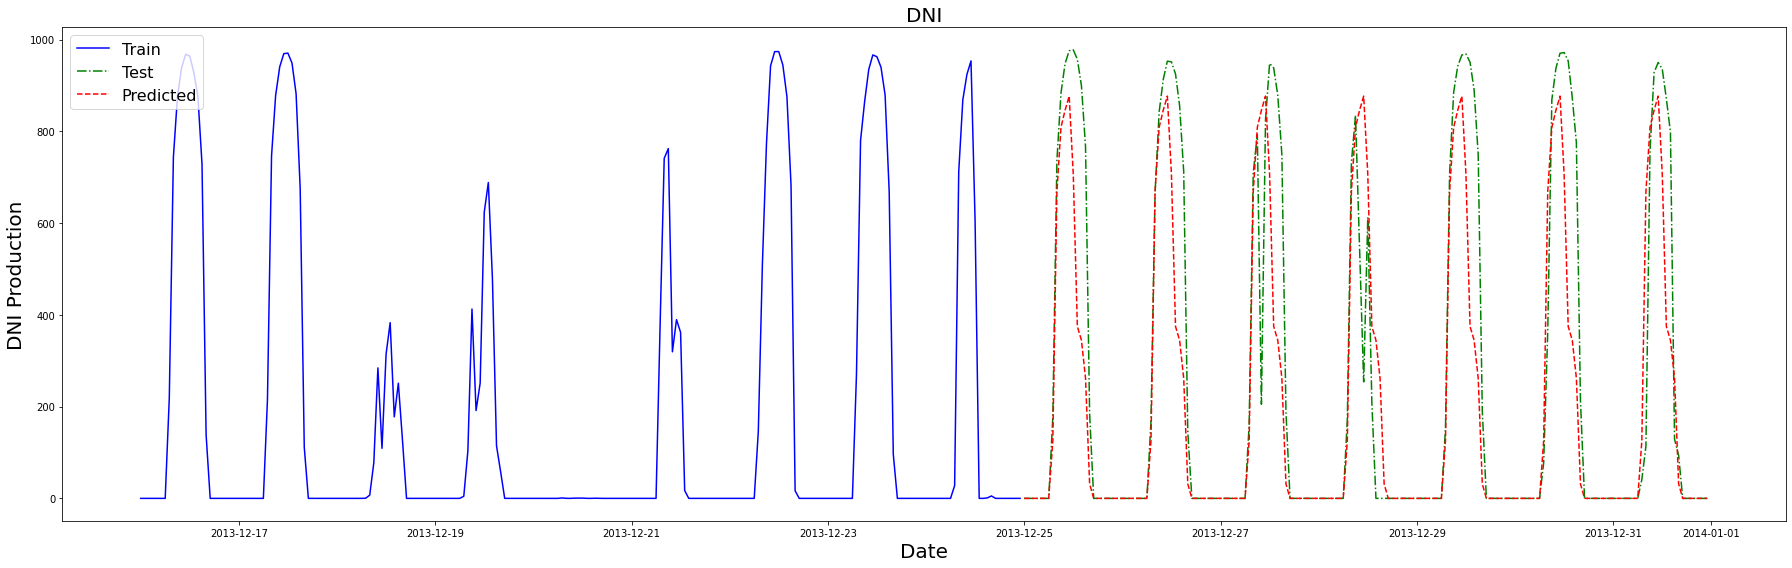

In [30]:
plt.figure(figsize=(25,8))

plt.plot(lim_train_data,'b-', label='Train')
plt.plot(test_data['Direct Normal [W/m^2]'],'g-.', label='Test')
plt.plot(predictions, 'r--', label='Predicted')
plt.legend(loc=2,fontsize=16)

plt.title('DNI', fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('DNI Production', fontsize=20)
# plt.axvspan(265, 289, color='#808080', alpha=0.2)
plt.tight_layout()

plt.show()